# Análisis Exploratorio de Datos (EDA)
## Víctimas de Esterilizaciones Forzadas – Perú

### Objetivo del proyecto

El objetivo de este análisis exploratorio de datos (EDA) es comprender la
estructura, calidad y patrones principales del dataset sobre víctimas de
esterilizaciones forzadas atendidas por el Ministerio de la Mujer y
Poblaciones Vulnerables (MIMP).

Este análisis servirá como base para presentar información clara, limpia
y significativa a tomadores de decisión, facilitando una lectura crítica
de los datos y apoyando conclusiones fundamentadas.

## Contexto del dataset

El dataset contiene información anual sobre la atención de casos de
esterilizaciones forzadas en Centros de Emergencia Mujer (CEM), incluyendo:

- Año de reporte
- Ubicación geográfica (departamento, provincia, distrito)
- Número de casos atendidos
- Distribución por sexo y rangos de edad
- Actividades de atención realizadas

Como todo dataset administrativo, puede contener errores, valores faltantes
o columnas sin información relevante, por lo que es necesario un proceso
riguroso de limpieza antes del análisis.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

- **pandas**: manipulación y análisis de datos en tablas
- **numpy**: operaciones numéricas
- **matplotlib / seaborn**: visualización de datos

## Carga del dataset

Se carga el archivo CSV original proporcionado, verificando que los datos se lean correctamente antes de iniciar cualquier transformación.


In [40]:
ruta = "data/mimp_esterilizaciones.csv"
df = pd.read_csv(ruta, encoding="latin1", sep=";")

df.shape


(138, 51)

## Exploración inicial del dataset

Antes de realizar cualquier limpieza, se explora la estructura general
del conjunto de datos.


In [41]:
df.head()

,AÑO DEL REPORTE DE INFORMACION,PERIODO DE LA INFORMACION REMITIDA,FECHA DE REPORTE DE LA INFORMACIÓN,CODIGO DE LA ENTIDAD (ENT001),PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR Y SEXUAL,CODIGO DE LA LINEA DE INTERVENCION (LIN001),NOMBRE DE LA LINEA DE INTERVENCIÓN (ATENCIÓN INTEGRAL Y MULTIDISCIPLINARIA PARA VICTIMAS DE VIOLENCIA),CODIGO DEL SERVICIO (SER001),NOMBRE DEL SERVICIO (CENTRO DE EMERGENCIA MUJER),UBIGEO DE LA UBICACIÓN GEOGRÁFICA DEL CEM - SEGÚN EL INEI,DEPARTAMENTO DEL CEM,PROVINCIA DEL CEM,DISTRITO DEL CEM,CENTRO POBLADO DEL CEM,ÁREA DE RESIDENCIA DEL CEM,CODIGO DEL CEM,NOMBRE DEL CEM,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - MUJERES,N° DE ACTIVIDADES EN LA ATENCIÓN - TOTAL,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,2016,ENE - DIC,31/12/2016,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,90201,HUANCAVELICA,ACOBAMBA,ACOBAMBA,ACOBAMBA,URBANO,CEM002,ACOBAMBA,79,3,76,0,0,0,74,2,72.0,5,1,4,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,ENE - DIC,31/12/2016,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,90301,HUANCAVELICA,ANGARAES,LIRCAY,LIRCAY,URBANO,CEM135,ANGARAES,9,0,9,0,0,0,9,0,9.0,0,0,0,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,ENE - DIC,31/12/2016,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,80301,CUSCO,ANTA,ANTA,ANTA,URBANO,CEM146,ANTA,412,2,410,0,0,0,384,2,382.0,28,0,28,2 729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,ENE - DIC,31/12/2016,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,220201,SAN MARTÍN,BELLAVISTA,BELLAVISTA,BELLAVISTA,URBANO,CEM167,BELLAVISTA - SAN MARTIN,25,1,24,0,0,0,21,0,21.0,4,1,3,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,ENE - DIC,31/12/2016,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,CAJAMARCA,URBANO,CEM009,CAJAMARCA,41,0,41,0,0,0,39,0,39.0,2,0,2,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.tail()

,AÑO DEL REPORTE DE INFORMACION,PERIODO DE LA INFORMACION REMITIDA,FECHA DE REPORTE DE LA INFORMACIÓN,CODIGO DE LA ENTIDAD (ENT001),PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR Y SEXUAL,CODIGO DE LA LINEA DE INTERVENCION (LIN001),NOMBRE DE LA LINEA DE INTERVENCIÓN (ATENCIÓN INTEGRAL Y MULTIDISCIPLINARIA PARA VICTIMAS DE VIOLENCIA),CODIGO DEL SERVICIO (SER001),NOMBRE DEL SERVICIO (CENTRO DE EMERGENCIA MUJER),UBIGEO DE LA UBICACIÓN GEOGRÁFICA DEL CEM - SEGÚN EL INEI,DEPARTAMENTO DEL CEM,PROVINCIA DEL CEM,DISTRITO DEL CEM,CENTRO POBLADO DEL CEM,ÁREA DE RESIDENCIA DEL CEM,CODIGO DEL CEM,NOMBRE DEL CEM,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - MUJERES,N° DE ACTIVIDADES EN LA ATENCIÓN - TOTAL,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
133,2019,ENE - DIC,14/1/2020,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,220701,SAN MARTIN,PICOTA,PICOTA,PICOTA,URBANO,CEM182,PICOTA,2,0,2,0,0,0,2,0,2.0,0,0,0,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2019,ENE - DIC,14/1/2020,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,220901,SAN MARTIN,SAN MARTIN,TARAPOTO,TARAPOTO,URBANO,CEM099,TARAPOTO,17,0,17,0,0,0,14,0,14.0,3,0,3,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,2019,ENE - DIC,14/1/2020,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,90701,HUANCAVELICA,TAYACAJA,PAMPAS,PAMPAS,URBANO,CEM101,TAYACAJA,0,0,0,0,0,0,0,0,0.0,0,0,0,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2020,ENE - DIC,15/1/2021,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,220701,SAN MARTIN,PICOTA,PICOTA,PICOTA,URBANO,CEM182,PICOTA,3,0,3,0,0,0,2,0,2.0,1,0,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,2020,ENE - DIC,15/1/2021,ENT001,PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR...,LIN001,ATENCIÓN DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS,SER001,CENTRO EMERGENCIA MUJER,220901,SAN MARTIN,SAN MARTIN,TARAPOTO,TARAPOTO,URBANO,CEM099,TARAPOTO,0,0,0,0,0,0,0,0,0.0,0,0,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.shape

(138, 51)

In [44]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 51 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   AÑO DEL REPORTE DE INFORMACION                                                                          138 non-null    int64  
 1   PERIODO DE LA INFORMACION REMITIDA                                                                      138 non-null    str    
 2   FECHA DE REPORTE DE LA INFORMACIÓN                                                                      138 non-null    str    
 3   CODIGO DE LA ENTIDAD (ENT001)                                                                           138 non-null    str    
 4   PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR Y SEXUAL                                                

## 📈 Estadísticas descriptivas
Se calculan estadísticas básicas de las variables numéricas para identificar valores extremos, posibles errores o distribuciones atípicas.

In [45]:
df.describe()

,AÑO DEL REPORTE DE INFORMACION,UBIGEO DE LA UBICACIÓN GEOGRÁFICA DEL CEM - SEGÚN EL INEI,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - MUJERES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - TOTAL,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - HOMBRES,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - MUJERES,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.0,138.0,138.0,138.000000,138.000000,137.000000,138.000000,138.000000,138.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2016.949275,122716.688406,44.217391,1.333333,42.884058,0.0,0.0,0.0,41.608696,1.065217,40.839416,2.608696,0.268116,2.340580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.930603,60510.011207,69.738797,2.992285,68.285155,0.0,0.0,0.0,65.680429,2.540781,64.654083,4.653599,0.656688,4.318516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.000000,20101.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2016.000000,80601.000000,2.250000,0.000000,2.250000,0.0,0.0,0.0,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,105404.000000,17.000000,0.000000,16.500000,0.0,0.0,0.0,15.500000,0.000000,15.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.000000,157829.750000,53.250000,1.000000,50.000000,0.0,0.0,0.0,50.250000,1.000000,48.000000,3.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020.000000,250101.000000,412.000000,20.000000,410.000000,0.0,0.0,0.0,384.000000,17.000000,382.000000,28.000000,3.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.columns

Index(['AÑO DEL REPORTE DE INFORMACION', 'PERIODO DE LA INFORMACION REMITIDA',
       'FECHA DE REPORTE DE LA INFORMACIÓN', 'CODIGO DE LA ENTIDAD (ENT001)',
       'PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR Y SEXUAL',
       'CODIGO DE LA LINEA DE INTERVENCION (LIN001)',
       'NOMBRE DE LA LINEA DE INTERVENCIÓN (ATENCIÓN INTEGRAL Y MULTIDISCIPLINARIA PARA VICTIMAS DE VIOLENCIA)',
       'CODIGO DEL SERVICIO (SER001)',
       'NOMBRE DEL SERVICIO (CENTRO DE EMERGENCIA MUJER)',
       'UBIGEO DE LA UBICACIÓN GEOGRÁFICA DEL CEM  - SEGÚN EL INEI',
       'DEPARTAMENTO DEL CEM', 'PROVINCIA DEL CEM', 'DISTRITO DEL CEM',
       'CENTRO POBLADO DEL CEM', 'ÁREA DE RESIDENCIA DEL CEM',
       'CODIGO DEL CEM', 'NOMBRE DEL CEM',
       'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL',
       'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES ',
       'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES',
       'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS

In [49]:
df.nunique()

AÑO DEL REPORTE DE INFORMACION                                                                              5
PERIODO DE LA INFORMACION REMITIDA                                                                          1
FECHA DE REPORTE DE LA INFORMACIÓN                                                                          5
CODIGO DE LA ENTIDAD (ENT001)                                                                               1
PROGRAMA NACIONAL CONTRA LA VIOLENCIA FAMILIAR Y SEXUAL                                                     1
CODIGO DE LA LINEA DE INTERVENCION (LIN001)                                                                 1
NOMBRE DE LA LINEA DE INTERVENCIÓN (ATENCIÓN INTEGRAL Y MULTIDISCIPLINARIA PARA VICTIMAS DE VIOLENCIA)      1
CODIGO DEL SERVICIO (SER001)                                                                                1
NOMBRE DEL SERVICIO (CENTRO DE EMERGENCIA MUJER)                                                            1
UBIGEO DE 

## Calidad de los datos
### Análisis de valores nulos

Se identifican columnas con valores faltantes que podrían afectar el análisis.

In [50]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 50                                                                                               138
Unnamed: 40                                                                                               138
Unnamed: 32                                                                                               138
Unnamed: 33                                                                                               138
Unnamed: 34                                                                                               138
Unnamed: 35                                                                                               138
Unnamed: 36                                                                                               138
Unnamed: 37                                                                                               138
Unnamed: 38                                                                                               138
Unnamed: 3

## Registros duplicados
Se verifica si existen filas completamente duplicadas.

In [51]:
df.duplicated().sum()

np.int64(0)

## Limpieza inicial de datos
En esta etapa se realiza una limpieza mínima, eliminando únicamente
columnas sin información útil.

## Eliminación de columnas “Unnamed”
Estas columnas no contienen datos relevantes y no aportan valor al análisis.

In [52]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

## ⚠️ Observaciones críticas sobre la calidad de los datos
Durante el análisis exploratorio se detectó que el rango de edad 18 a 29 años presenta valores nulos o ceros en todos los registros.

Desde un punto de vista demográfico y contextual, esta ausencia resulta poco plausible, dado que corresponde a la etapa de mayor edad reproductiva, especialmente considerando el contexto histórico y social del Perú durante el periodo analizado.

Esto sugiere un posible subregistro u omisión sistemática de información, por lo que los resultados deben interpretarse considerando esta limitación del conjunto de datos.

## Análisis exploratorio de los datos

## Casos totales por año de reporte

In [53]:
df.groupby('AÑO DEL REPORTE DE INFORMACION')['N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL'].sum()

AÑO DEL REPORTE DE INFORMACION
2016    3580
2017    2398
2018      94
2019      27
2020       3
Name: N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL, dtype: int64

## Casos totales por departamento

In [54]:
df.groupby('DEPARTAMENTO DEL CEM')[
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL'
].sum().sort_values(ascending=False)


DEPARTAMENTO DEL CEM
CUSCO                 1643
SAN MARTÍN            1188
HUANCAVELICA           675
AYACUCHO               570
HUÁNUCO                471
JUNÍN                  336
PIURA                  232
CAJAMARCA              208
LIMA METROPOLITANA     167
APURÍMAC               157
LA LIBERTAD            151
UCAYALI                106
MOQUEGUA                75
SAN MARTIN              46
APURIMAC                27
ANCASH                  21
CALLAO                  15
LORETO                   7
ICA                      3
ÁNCASH                   3
LIMA PROVINCIA           1
JUNIN                    0
Name: N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL, dtype: int64

## Distribución total por sexo

In [55]:
df[[
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES ',
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES'
]].sum()


N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES      184
N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES     5918
dtype: int64

## Visualizaciones
En esta sección se desarrollarán visualizaciones para representar:

- Evolución temporal de los casos

- Departamentos con mayor número de víctimas

- Comparación entre hombres y mujeres

Estas visualizaciones permitirán reforzar visualmente los patrones
identificados durante el análisis exploratorio.

## Conclusiones preliminares
El análisis exploratorio permitió identificar:

La estructura y complejidad del dataset

Problemas de calidad y posibles sesgos de registro

Patrones generales por año, territorio y sexo

Limitaciones importantes en la información por rangos de edad

Este EDA constituye una base sólida para análisis posteriores más profundos
y para la formulación de conclusiones contextualizadas y éticamente responsables

## 📊 Visualizaciones del análisis exploratorio


📈 1. Evolución de casos a lo largo del tiempo
¿En qué año se reportaron más casos de esterilizaciones forzadas?

In [56]:
casos_por_anio = (
    df.groupby('AÑO DEL REPORTE DE INFORMACION')[
        'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL'
    ]
    .sum()
    .reset_index()
)

casos_por_anio


,AÑO DEL REPORTE DE INFORMACION,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL
0,2016,3580
1,2017,2398
2,2018,94
3,2019,27
4,2020,3


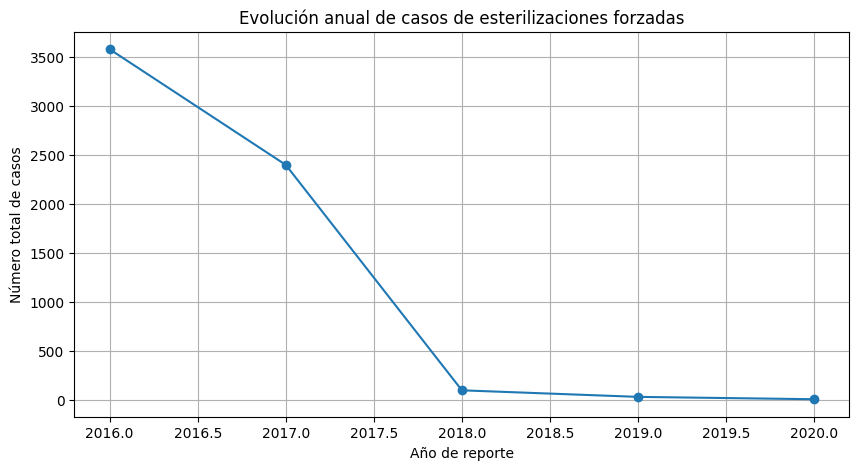

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(
    casos_por_anio['AÑO DEL REPORTE DE INFORMACION'],
    casos_por_anio['N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL'],
    marker='o'
)

plt.title('Evolución anual de casos de esterilizaciones forzadas')
plt.xlabel('Año de reporte')
plt.ylabel('Número total de casos')
plt.grid(True)
plt.show()


## Interpretacion
El gráfico muestra la evolución de los casos reportados a lo largo del tiempo. Se observan que en el año 2016 se reportaron un total de 3.580 casos registrados, siendo el año con más registros, seguido del 2017, con 2398 victimas de esterilizaciones forzadas. Podemos observar ademas que el descenso segun los años, registrando en el año 2020 solo 3 casos de esterilizaciones forzadas. 

## Casos por departamento
¿En qué departamentos se concentran más casos?

In [58]:
casos_por_departamento = (
    df.groupby('DEPARTAMENTO DEL CEM')[
        'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL'
    ]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

casos_por_departamento.head()


,DEPARTAMENTO DEL CEM,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL
0,CUSCO,1643
1,SAN MARTÍN,1188
2,HUANCAVELICA,675
3,AYACUCHO,570
4,HUÁNUCO,471


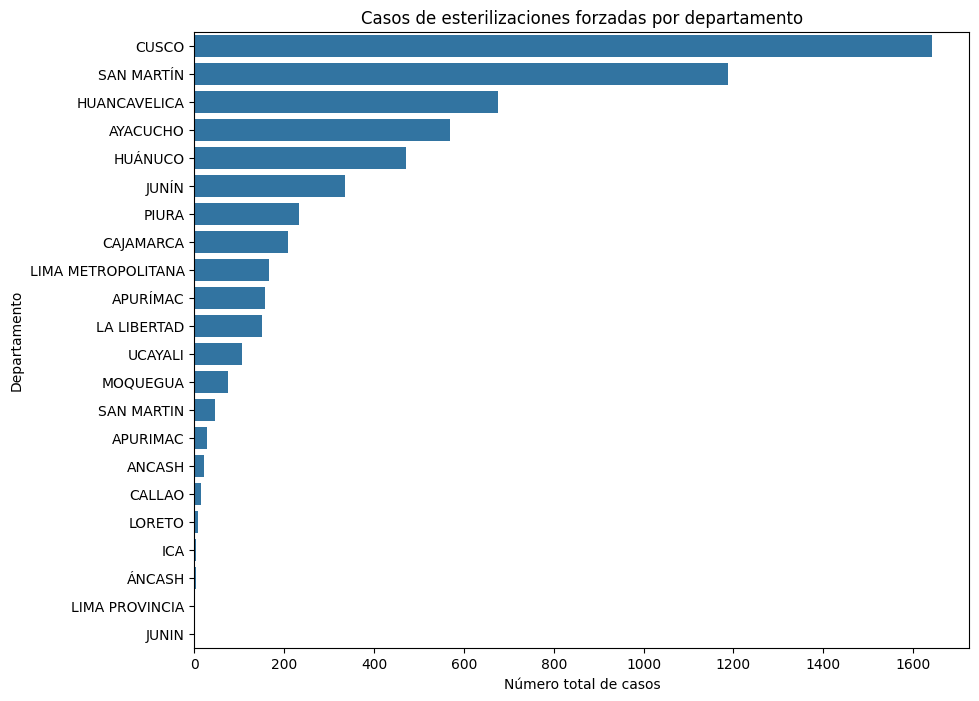

In [59]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=casos_por_departamento,
    y='DEPARTAMENTO DEL CEM',
    x='N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS -TOTAL'
)

plt.title('Casos de esterilizaciones forzadas por departamento')
plt.xlabel('Número total de casos')
plt.ylabel('Departamento')
plt.show()


## Interpretacion
El gráfico permite identificar los departamentos con mayor número de casos registrados. En ese sentido, observamos que en los departamentos de Huancavelica, Ayacucho, Huánuco y Junin se registraron mayoritariamente las victimas de esterilizaciones forzadas en el Perú.
Esta concentración puede estar relacionada con factores demográficos, históricos o con la capacidad de registro de los CEM. 


## Distribucion de casos por sexo
¿Quiénes fueron más afectados según el registro: hombres o mujeres?

In [60]:
casos_por_sexo = df[[
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES ',
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES'
]].sum()

casos_por_sexo


N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - HOMBRES      184
N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - MUJERES     5918
dtype: int64

In [61]:
casos_por_sexo = casos_por_sexo.reset_index()
casos_por_sexo.columns = ['Sexo', 'Total de casos']

casos_por_sexo

,Sexo,Total de casos
0,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZA...,184
1,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZA...,5918


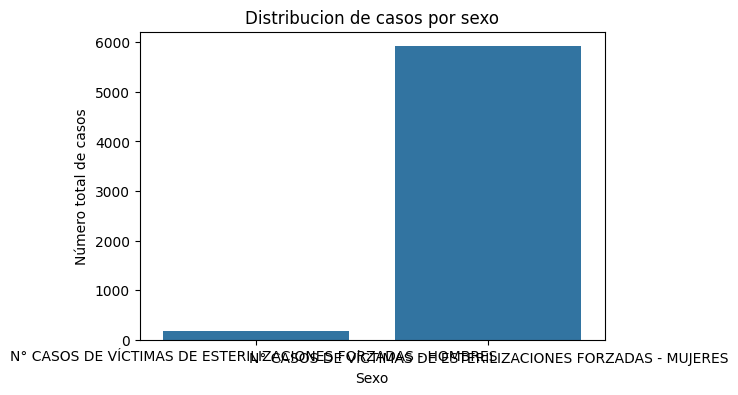

In [62]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=casos_por_sexo,
    x='Sexo',
    y='Total de casos'
)

plt.title('Distribucion de casos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número total de casos')
plt.show()

## Interpretacion
La visualización evidencia una clara diferencia en el número de casos
registrados entre hombres y mujeres, lo cual coincide con el contexto
histórico de las esterilizaciones forzadas en el país. En la gráfica se observa 5918 casos de esterilizacion hacia el grupo femenino, 184 victimas de esterilizacion en el genero opuesto, siendo mayoria las mujeres vicitmas de las esterilizaciones forzadas.

## Distribucion por rangos de edad
¿A qué edad se registraron mas los casos de esterilizaciones forzadas?

In [63]:
casos_por_edad = df[[
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - TOTAL',
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - TOTAL',
    'N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - TOTAL'
]].sum()

casos_por_edad


N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 18_29 - TOTAL        0
N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 30_59 - TOTAL     5742
N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZADAS - 60_MÁS - TOTAL     360
dtype: int64

In [64]:
casos_por_edad = casos_por_edad.reset_index()
casos_por_edad.columns = ['Rango de edad', 'Total de casos']

casos_por_edad


,Rango de edad,Total de casos
0,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZA...,0
1,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZA...,5742
2,N° CASOS DE VÍCTIMAS DE ESTERILIZACIONES FORZA...,360


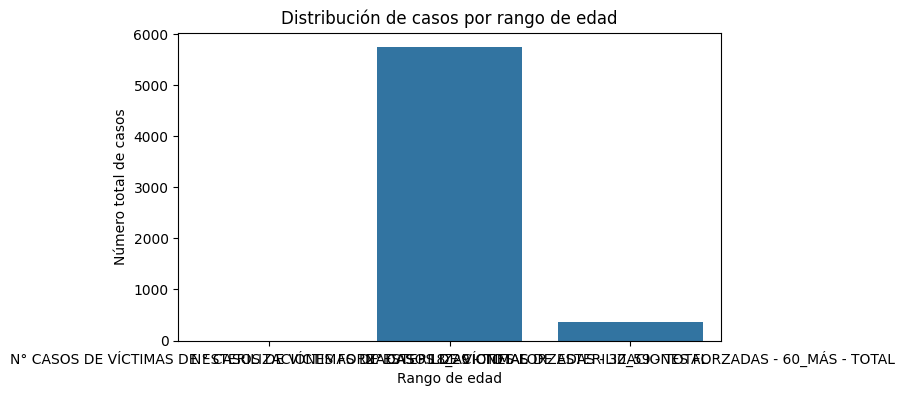

In [65]:
plt.figure(figsize=(7, 4))
sns.barplot(
    data=casos_por_edad,
    x='Rango de edad',
    y='Total de casos'
)

plt.title('Distribución de casos por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Número total de casos')
plt.show()


## Interpretación crítica
El gráfico muestra ausencia de casos en el rango de 18 a 29 años, lo cual resulta poco plausible desde un punto de vista demográfico.

Esta visualización refuerza la hipótesis de subregistro u omisión de datos, por lo que cualquier análisis por edad debe interpretarse con cautela.

## Conclusiones generales

A partir del análisis exploratorio realizado sobre el dataset de víctimas de
esterilizaciones forzadas atendidas por los Centros de Emergencia Mujer (CEM),
se pueden extraer las siguientes conclusiones:

1️⃣ Calidad y estructura de los datos
El dataset presenta una estructura amplia, con múltiples variables
administrativas, geográficas y demográficas. Sin embargo, se identificaron:

Columnas sin información relevante (columnas “Unnamed”)

Presencia de valores nulos en diversas variables

Posibles problemas de subregistro en ciertos rangos etarios

Estas características hacen indispensable un proceso previo de limpieza
antes de cualquier análisis interpretativo.

2️⃣ Distribución temporal de los casos
El análisis por año de reporte evidencia variaciones significativas en el
número de casos registrados a lo largo del tiempo. Estas fluctuaciones pueden
estar asociadas a:

Cambios en los mecanismos de registro institucional

Diferencias en la visibilización de los casos

Variaciones en la capacidad operativa de los Centros de Emergencia Mujer

Por lo tanto, el número de casos reportados no debe interpretarse únicamente
como incidencia real, sino también como reflejo del contexto institucional.

3️⃣ Distribución geográfica
Los resultados muestran una concentración desigual de casos entre los
departamentos del país. Algunos departamentos presentan un número
significativamente mayor de registros, lo cual puede deberse a:

Mayor densidad poblacional

Diferencias en el acceso a servicios de atención

Capacidades diferenciadas de registro y reporte

Este hallazgo sugiere la necesidad de análisis regionales más profundos.

4️⃣ Distribución por sexo
El análisis evidencia una clara predominancia de casos registrados en mujeres
en comparación con hombres. Este resultado es consistente con el contexto
histórico de las esterilizaciones forzadas en el Perú, donde las mujeres
fueron las principales afectadas por estas prácticas.

5️⃣ Análisis por rangos de edad y observación crítica
Uno de los hallazgos más relevantes del análisis es la ausencia total de
casos registrados en el rango de edad de 18 a 29 años.

Desde una perspectiva demográfica y contextual, esta ausencia resulta poco
verosímil, dado que corresponde a una etapa de alta fecundidad. Esto sugiere
un posible subregistro u omisión sistemática de información.

Esta limitación debe ser considerada de manera explícita al interpretar los
resultados del análisis y al formular conclusiones a partir del dataset.

## 📌 Conclusión final
El análisis exploratorio de datos permitió identificar patrones generales,
limitaciones estructurales y posibles sesgos en el registro de información.
Los resultados obtenidos deben interpretarse con cautela, reconociendo que
los datos reflejan tanto la realidad de los casos como las condiciones bajo
las cuales fueron recolectados.

Este EDA constituye una base sólida para análisis posteriores más avanzados,
así como para la elaboración de informes orientados a la toma de decisiones
informadas.